In [53]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm

In [ ]:
# Numeric values
c_value   = 15
cJ_value  = 18
Lq_value  = 25
Lr_value  = 10
Δ_value  = 0.1

In [25]:
# Symbolic variables
c, α, cC, cJ, Lq, Lr, Δ = symbols('C, \\alpha, C_C, C_J^{\'}, L_q, L_r, Delta', real=True, positive=True, nonzero=True)
Lp = Lq/2 + Δ
Lm = Lq/2 - Δ
γ = simplify( 1/(Lp*Lm) / (1/Lr + 1/Lp + 1/Lm) )
l = 4*Lr/γ

In [114]:
L0 = Matrix([[ 1/Lm,      0,  -1/Lm             ],
            [    0,   1/Lp,  -1/Lp             ],
            [-1/Lm,  -1/Lp,  1/Lr + 1/Lp + 1/Lm]])

P1 = Matrix([[ 1,        0,  0],
             [ 0,        1,  0],
             [ γ*Lp,  γ*Lm,  0]])

C1 = Matrix([[α*cC + c + cJ,   -cJ],
            [ -cJ          ,  cC + c + cJ]])

In [115]:
L1 = nsimplify(simplify( P1.T * L0 * P1) )
L1 = L1[0:2,0:2]
L1

Matrix([
[2*(-2*Delta - L_q - 2*L_r)/(4*Delta**2 - L_q**2 - 4*L_q*L_r),                     4*L_r/(4*Delta**2 - L_q**2 - 4*L_q*L_r)],
[                     4*L_r/(4*Delta**2 - L_q**2 - 4*L_q*L_r), 2*(2*Delta - L_q - 2*L_r)/(4*Delta**2 - L_q**2 - 4*L_q*L_r)]])

In [116]:
P2, _ = C1.diagonalize()
P2 = 0.5 * P2

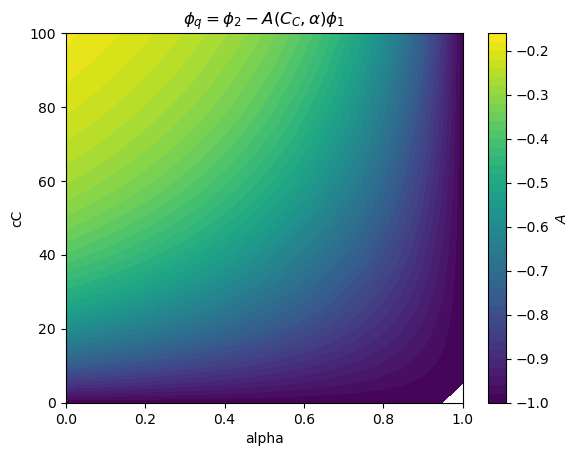

In [136]:
A = 2 * P2[1].subs([(c,c_value), (cJ,cJ_value), (Lq,Lq_value), (Lr,Lr_value), (Δ,Δ_value)])

# Create linspace arrays for alpha and cC
α_values = np.linspace(0, 1, 20)
cC_values = np.linspace(0, 100, 20)

# Evaluate the expression over the 2D grid
Z = np.empty((20, 20))
for i, α_val in enumerate(α_values):
    for j, cC_val in enumerate(cC_values):
        Z[i, j] = A.subs({α: α_val, cC: cC_val})

# Plot the filled contours
plt.contourf(α_values, cC_values, Z.T, levels=50, cmap='viridis' )#, norm=TwoSlopeNorm(vmin=Z.min(), vcenter=-1, vmax=Z.max()))
plt.colorbar(label=r'$A$', ticks = np.linspace(-1,0,11))

plt.xlabel('alpha')
plt.ylabel('cC')
plt.title(r'$\phi_q = \phi_2 - A(C_C,\alpha)\phi_1$')
plt.show()

In [127]:
C2 = nsimplify(simplify( P2.T * C1 * P2) )
L2 = nsimplify(simplify( P2.T * L1 * P2) )

In [134]:
ω_r = 1/sqrt(C2[0,0]*L2[0,0]**-1)/2/np.pi*1000
ω_f = 1/sqrt(C2[1,1]*L2[1,1]**-1)/2/np.pi*1000
ω_r.subs([(c,c_value), (cJ,cJ_value), (Lq,Lq_value), (Lr,Lr_value), (Δ,Δ_value), (cC,0)]).evalf(), ω_f.subs([(c,c_value), (cJ,cJ_value), (Lq,Lq_value), (Lr,Lr_value), (Δ,Δ_value), (cC,0)]).evalf()

(7.20838819651165, 6.30355261686479)

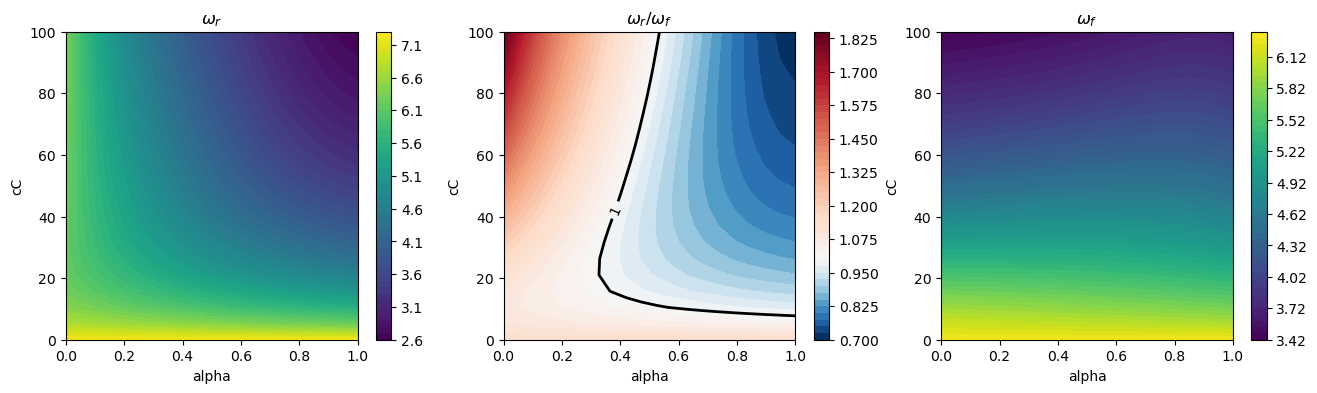

In [156]:
ω_r_subs = ω_r.subs([(c,c_value), (cJ,cJ_value), (Lq,Lq_value), (Lr,Lr_value), (Δ,Δ_value)])
ω_f_subs = ω_f.subs([(c,c_value), (cJ,cJ_value), (Lq,Lq_value), (Lr,Lr_value), (Δ,Δ_value)])

# Evaluate the expression over the 2D grid
Z1 = np.empty((20, 20))
Z2 = np.empty((20, 20))
Z3 = np.empty((20, 20))
for i, α_val in enumerate(α_values):
    for j, cC_val in enumerate(cC_values):
        Z1[i, j] = ω_r_subs.subs({α: α_val, cC: cC_val})
        Z2[i, j] = (ω_r_subs/ω_f_subs).subs({α: α_val, cC: cC_val})
        Z3[i, j] = ω_f_subs.subs({α: α_val, cC: cC_val})

titles = [r'$\omega_r $', r'$\omega_r / \omega_f$', r'$\omega_f$']
fig, ax = plt.subplots(ncols=3, figsize=[16,4])
for ax_i, Z, title in zip(ax, [Z1, Z2, Z3], titles):
    if ax_i == ax[1]:
        cont = ax_i.contourf(α_values, cC_values, Z.T, levels=50, cmap='RdBu_r', norm=TwoSlopeNorm(vmin=Z.min(), vcenter=1, vmax=Z.max()))
        contour_line = ax_i.contour(α_values, cC_values, Z.T, levels=[1], colors='black', linewidths=2)
        ax_i.clabel(contour_line, inline=1, fontsize=10, fmt='%1.0f')
    else:
        cont = ax_i.contourf(α_values, cC_values, Z.T, levels=50, cmap='viridis')
    fig.colorbar(cont, ax=ax_i)
    ax_i.set_xlabel('alpha')
    ax_i.set_ylabel('cC')
    ax_i.set_title(title)



plt.show()

In [13]:
P3, D = (C2**-1 * L2 ).diagonalize()

In [14]:
C3 = nsimplify(simplify( P3.T * C2 * P3 ) )
C3

Matrix([
[C/2 + C_J^{'} + (-2*C*L_r + C_J^{'}*L_q + sqrt(4*C**2*Delta**2 + 4*C**2*L_r**2 + 8*C*C_J^{'}*Delta**2 - 4*C*C_J^{'}*L_q*L_r + C_J^{'}**2*L_q**2))**2/(8*C*Delta**2),                                                                                                                                                                  0],
[                                                                                                                                                                  0, C/2 + C_J^{'} + (2*C*L_r - C_J^{'}*L_q + sqrt(4*C**2*Delta**2 + 4*C**2*L_r**2 + 8*C*C_J^{'}*Delta**2 - 4*C*C_J^{'}*L_q*L_r + C_J^{'}**2*L_q**2))**2/(8*C*Delta**2)]])

In [15]:
L3 = nsimplify(simplify( P3.T * L2 * P3 ) )
L3

Matrix([
[(4*C**2*Delta**2*(L_q + 4*L_r) + 4*C*Delta**2*(-2*C*L_r + C_J^{'}*L_q + sqrt(4*C**2*Delta**2 + 4*C**2*L_r**2 + 8*C*C_J^{'}*Delta**2 - 4*C*C_J^{'}*L_q*L_r + C_J^{'}**2*L_q**2)) + (4*C*Delta**2 + L_q*(-2*C*L_r + C_J^{'}*L_q + sqrt(4*C**2*Delta**2 + 4*C**2*L_r**2 + 8*C*C_J^{'}*Delta**2 - 4*C*C_J^{'}*L_q*L_r + C_J^{'}**2*L_q**2)))*(-2*C*L_r + C_J^{'}*L_q + sqrt(4*C**2*Delta**2 + 4*C**2*L_r**2 + 8*C*C_J^{'}*Delta**2 - 4*C*C_J^{'}*L_q*L_r + C_J^{'}**2*L_q**2)))/(4*C**2*Delta**2*(-4*Delta**2 + L_q**2 + 4*L_q*L_r)),                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [16]:
w1 = 1/sqrt(C3[0,0]*L3[0,0]**-1)
w2 = 1/sqrt(C3[1,1]*L3[1,1]**-1)
(w1/2/np.pi).subs({c:15, cJ:18, Lq:25, Lr:10, Δ:0.1}).evalf(),  (w2/2/np.pi).subs({c:15, cJ:18, Lq:25, Lr:10, Δ:0.1}).evalf()

(0.00720867642830948, 0.00630322299598601)

In [31]:
(P3[0,0]).subs({c:15, cJ:18, Lq:25, Lr:10, Δ:0.1}).evalf()
(P3[0,0]).subs({c:15, cJ:18, Lq:25, Lr:10})

(sqrt(3060*Delta**2 + 22500) + 150)/(30*Delta)

In [32]:
(P3[0,1]**-1).subs({c:15, cJ:18, Lq:25, Lr:10, Δ:0.1}).evalf()
(P3[0,1]**-1).subs({c:15, cJ:18, Lq:25, Lr:10})

30*Delta/(150 - sqrt(3060*Delta**2 + 22500))

In [4]:
Φ_1, Φ_2, Φ_3 = symbols('Phi_1,Phi_2,Phi_3', real=True, positive=True, nonzero=True)


In [11]:
simplify( 4*Lr/l*(Lp*Φ_1 + Lm*Φ_2) )

2*L_r*(Phi_1*(2*Delta + L_q) - Phi_2*(2*Delta - L_q))/(-4*Delta**2 + L_q**2 + 4*L_q*L_r)

In [10]:
simplify( 2*Lr*Lq/l *(Φ_1 + Φ_2) + 4*Lr/l*Δ*(Φ_1 - Φ_2))

2*L_r*(2*Delta*(Phi_1 - Phi_2) + L_q*(Phi_1 + Phi_2))/(-4*Delta**2 + L_q**2 + 4*L_q*L_r)

In [38]:
m = 1/2 * (c*2*Lr*Lq/l)**-1
m = 1/2 * (c*4*Lr/l*Δ)**-1

In [39]:
k = 2 / Lr

In [44]:
sqrt(k/m).subs({c:15, cJ:18, Lq:25, Lr:10, Δ:0.1}).evalf()

0.790826887582724*I

In [31]:
sqrt(Lr * c*2*Lr*Lq/l).subs({c:15, cJ:18, Lq:25, Lr:10, Δ:0.1}).evalf()

6.79374582071531

In [19]:
1.358 / 0.007

194.0

In [20]:
14186 / 7

2026.5714285714287